✅ Step 1: Data Preprocessing Code

In [ ]:

# Step 1: Data Preprocessing

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import joblib

# Load the dataset
df = pd.read_excel("world_bank_dataset.xlsx")

# Handle missing values
df.dropna(inplace=True)

# Encode categorical column 'Country'
le = LabelEncoder()
df['Country'] = le.fit_transform(df['Country'])

# Define initial features and target
features = ['Country', 'Year', 'Population', 'Life Expectancy', 'Unemployment Rate (%)',
            'CO2 Emissions (metric tons per capita)', 'Access to Electricity (%)']
target = 'GDP (USD)'

# Prepare feature and target sets
X = df[features]
y = df[target]

# Scale input features
input_scaler = StandardScaler()
X_scaled = input_scaler.fit_transform(X)

# Scale target variable
target_scaler = StandardScaler()
y_scaled = target_scaler.fit_transform(y.values.reshape(-1, 1))  # Reshape for scaler

# Save both scalers for Streamlit use
joblib.dump(input_scaler, 'scaler.pkl')
joblib.dump(target_scaler, 'target_scaler.pkl')

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Output shape check
print("✅ Data Preprocessing Complete")
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)


✅ Data Preprocessing Complete
X_train shape: (160, 7)
y_train shape: (160, 1)


✅ Step 2: EDA Code


📊 Summary Statistics:
          Country         Year     GDP (USD)    Population  Life Expectancy  \
count  200.000000   200.000000  2.000000e+02  2.000000e+02       200.000000   
mean     9.590000  2014.500000  1.056867e+13  7.387908e+08        66.324500   
std      5.704789     2.879489  5.547703e+12  4.389956e+08         9.818859   
min      0.000000  2010.000000  1.011720e+12  9.970000e+06        50.500000   
25%      5.000000  2012.000000  5.774120e+12  3.533775e+08        57.775000   
50%      9.000000  2014.500000  1.050615e+13  7.216700e+08        64.900000   
75%     14.000000  2017.000000  1.503451e+13  1.090860e+09        74.500000   
max     19.000000  2019.000000  1.998377e+13  1.498060e+09        84.900000   

       Unemployment Rate (%)  CO2 Emissions (metric tons per capita)  \
count             200.000000                              200.000000   
mean               13.222100                               10.058200   
std                 6.857327                     

C:\Users\joshin joseph\AppData\Local\Temp\ipykernel_11120\718062544.py:17: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\joshin joseph\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


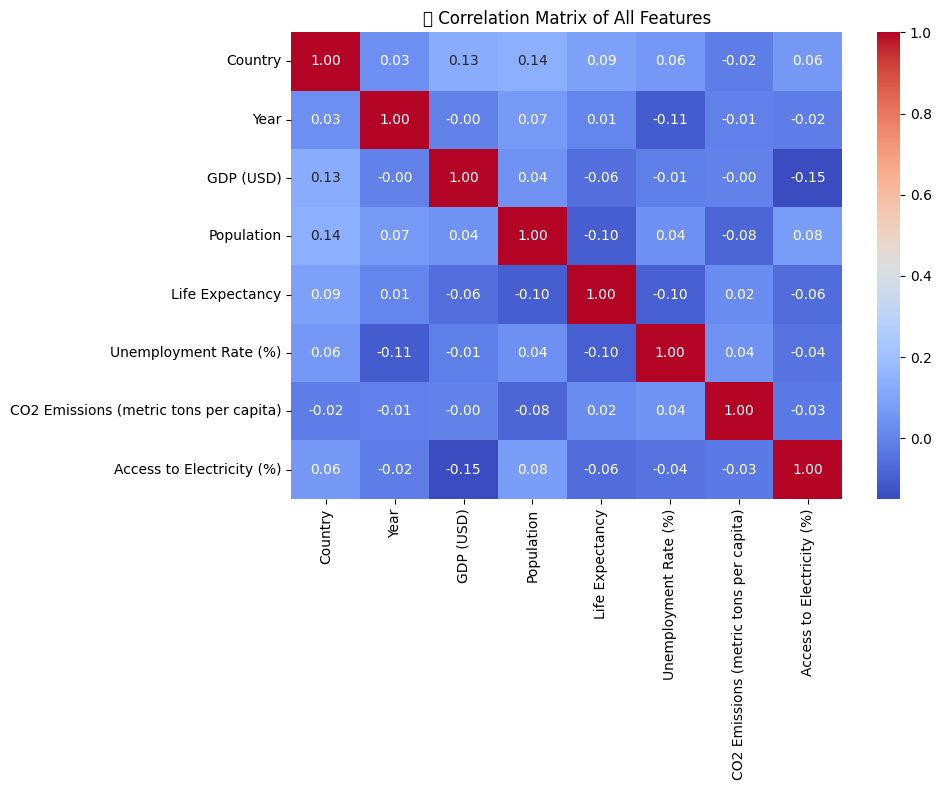

C:\Users\joshin joseph\AppData\Local\Temp\ipykernel_11120\718062544.py:26: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\joshin joseph\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


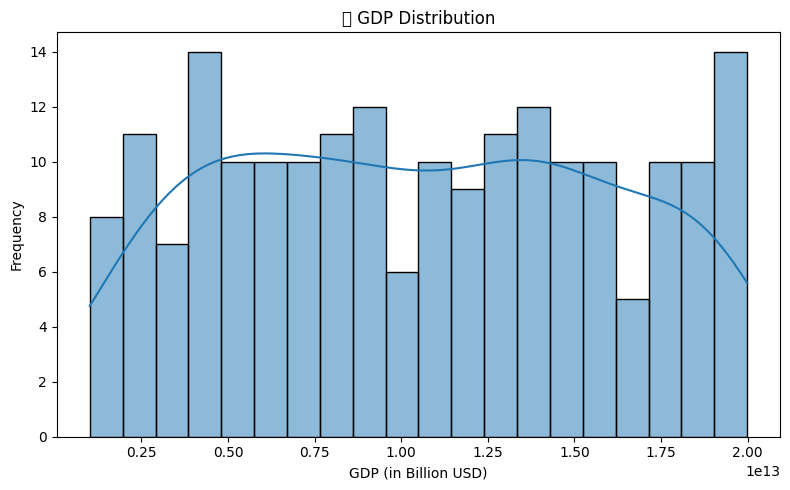

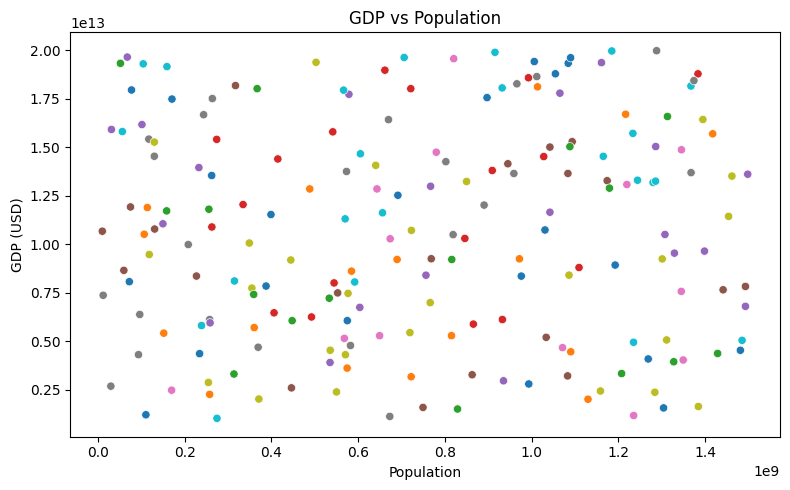

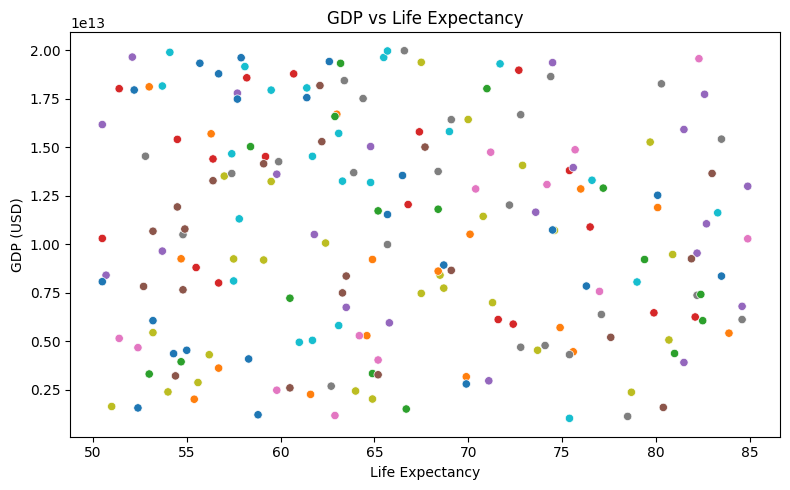

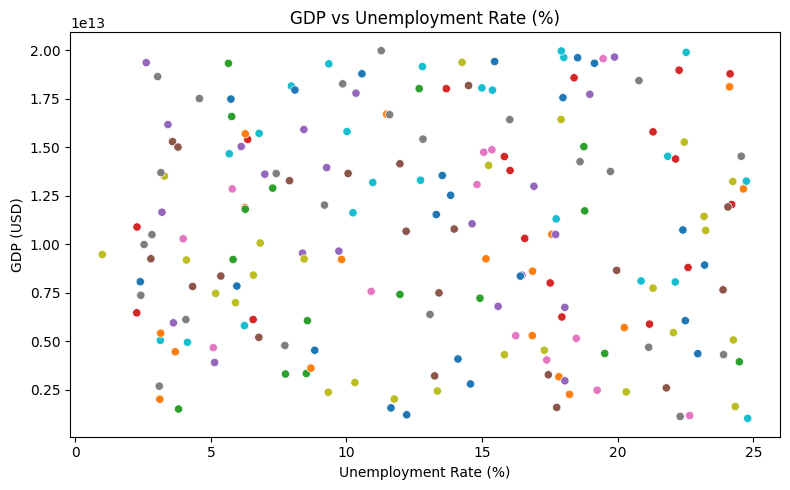

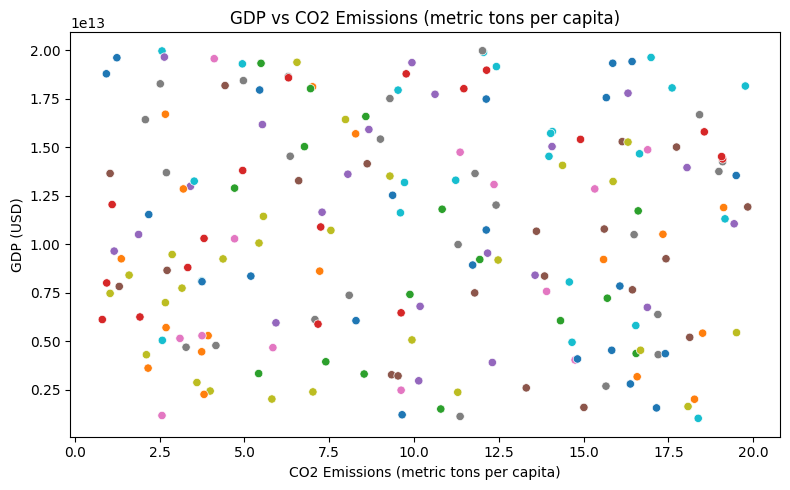

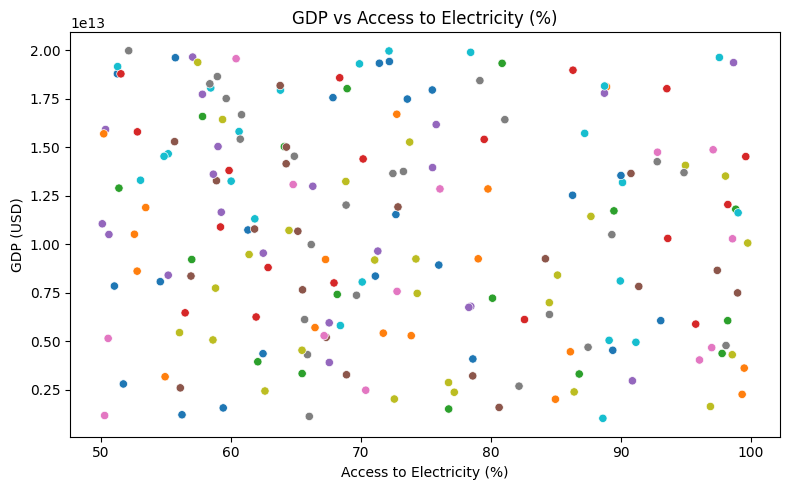

C:\Users\joshin joseph\AppData\Local\Temp\ipykernel_11120\718062544.py:54: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\joshin joseph\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


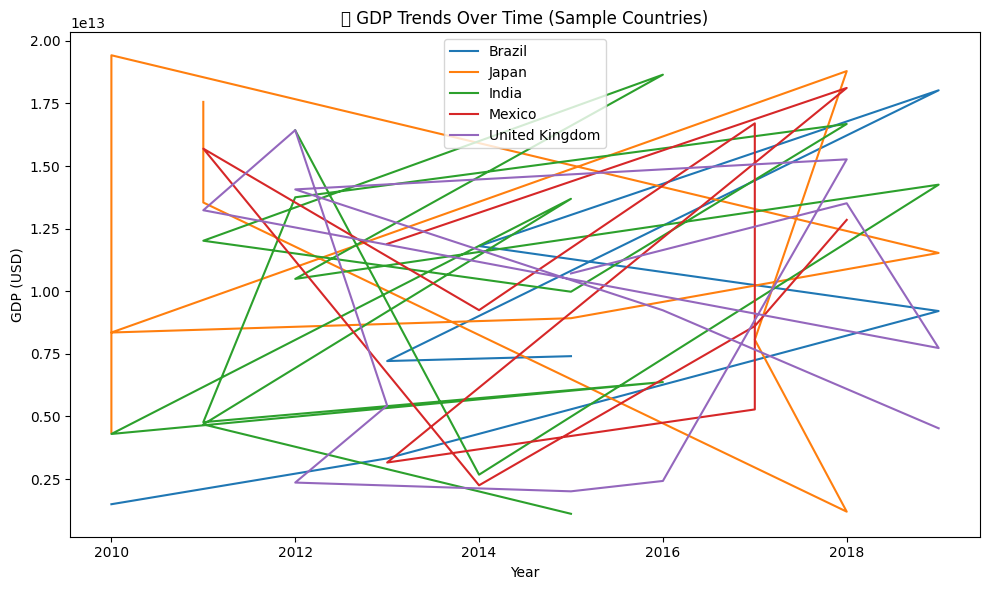

In [2]:
# Step 2: Exploratory Data Analysis (EDA)

import matplotlib.pyplot as plt
import seaborn as sns

# Use a copy of the original (non-scaled) DataFrame
eda_df = df.copy()

# Basic statistics
print("\n📊 Summary Statistics:")
print(eda_df.describe())

# Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(eda_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("🔗 Correlation Matrix of All Features")
plt.tight_layout()
plt.show()

# GDP Distribution
plt.figure(figsize=(8, 5))
sns.histplot(eda_df['GDP (USD)'], kde=True, bins=20)
plt.title("💰 GDP Distribution")
plt.xlabel("GDP (in Billion USD)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# Scatter plots: GDP vs key numerical indicators
num_cols = ['Population', 'Life Expectancy', 'Unemployment Rate (%)',
            'CO2 Emissions (metric tons per capita)', 'Access to Electricity (%)']

for col in num_cols:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=eda_df, x=col, y='GDP (USD)', hue='Country', palette='tab10', legend=False)
    plt.title(f"GDP vs {col}")
    plt.xlabel(col)
    plt.ylabel("GDP (USD)")
    plt.tight_layout()
    plt.show()

# GDP over Time: Line plots for first 5 countries
sample_countries = eda_df['Country'].unique()[:5]
plt.figure(figsize=(10, 6))
for c in sample_countries:
    country_name = le.inverse_transform([c])[0]
    country_data = eda_df[eda_df['Country'] == c]
    plt.plot(country_data['Year'], country_data['GDP (USD)'], label=country_name)

plt.title("📈 GDP Trends Over Time (Sample Countries)")
plt.xlabel("Year")
plt.ylabel("GDP (USD)")
plt.legend()
plt.tight_layout()
plt.show()


What You'll See:
Heatmap showing correlations (GDP vs other features)

Histogram of GDP distribution

Scatter plots (GDP vs Population, Electricity, etc.)

Line plot showing GDP growth for a few countries

✅ Step 2.a: Feature Engineering Code

In [3]:
# Step 2.a: Feature Engineering

# Copy the original dataframe
fe_df = df.copy()

# 1. GDP per Capita
fe_df['GDP_per_Capita'] = fe_df['GDP (USD)'] * 1e9 / (fe_df['Population'] * 1e6)

# 2. GDP Growth Rate (year-over-year change per country)
fe_df = fe_df.sort_values(by=['Country', 'Year'])
fe_df['GDP_Growth_Rate'] = fe_df.groupby('Country')['GDP (USD)'].pct_change() * 100

# 3. Inverse Unemployment Rate
fe_df['Inverse_Unemployment'] = 1 / (fe_df['Unemployment Rate (%)'] + 1e-3)

# Drop rows where GDP_Growth_Rate is NaN (first year of each country)
fe_df = fe_df.dropna(subset=['GDP_Growth_Rate'])

# Show engineered features
print("\n🛠️ Feature Engineering Complete — Sample:")
print(fe_df[['Country', 'Year', 'GDP (USD)', 'Population', 'GDP_per_Capita', 'GDP_Growth_Rate', 'Inverse_Unemployment']].head())



🛠️ Feature Engineering Complete — Sample:
     Country  Year     GDP (USD)    Population  GDP_per_Capita  \
11         0  2011  1.933735e+13  1.084140e+09    1.783658e+07   
102        0  2012  1.252395e+13  6.914700e+08    1.811207e+07   
122        0  2012  1.962230e+13  1.089730e+09    1.800657e+07   
162        0  2012  1.748888e+13  1.705900e+08    1.025200e+08   
25         0  2015  1.549940e+12  1.304040e+09    1.188568e+06   

     GDP_Growth_Rate  Inverse_Unemployment  
11          7.689193              0.052244  
102       -35.234404              0.072249  
122        56.678205              0.053993  
162       -10.872426              0.174186  
25        -91.137569              0.085903  


What’s Next?
We’ll now:

✅ Update the feature list to include these new features

✅ Recreate the scaled input/output

✅ Save new scalers

✅ Train and evaluate multiple models

the newly engineered features to train and compare the following models:

✅ Linear Regression

✅ Random Forest Regressor

✅ Gradient Boosting Regressor

✅ XGBoost Regressor

And evaluate them using:

MAE (Mean Absolute Error)

RMSE (Root Mean Squared Error)

R² Score

✅ Step 3: Model Selection & Evaluation Code

In [4]:
# Step 3: Model Selection

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Updated feature list after engineering
new_features = ['Country', 'Year', 'Population', 'Life Expectancy', 'Unemployment Rate (%)',
                'CO2 Emissions (metric tons per capita)', 'Access to Electricity (%)',
                'GDP_per_Capita', 'GDP_Growth_Rate', 'Inverse_Unemployment']
target = 'GDP (USD)'

# Prepare X and y
X = fe_df[new_features]
y = fe_df[target]

# Scale input features
from sklearn.preprocessing import StandardScaler
import joblib

input_scaler = StandardScaler()
X_scaled = input_scaler.fit_transform(X)

# Scale target
target_scaler = StandardScaler()
y_scaled = target_scaler.fit_transform(y.values.reshape(-1, 1))

# Save both scalers
joblib.dump(input_scaler, 'scaler.pkl')
joblib.dump(target_scaler, 'target_scaler.pkl')

# Split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Models to evaluate
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42, objective='reg:squarederror')
}

# Evaluate each model
results = {}

for name, model in models.items():
    model.fit(X_train, y_train.ravel())
    preds_scaled = model.predict(X_test).reshape(-1, 1)
    preds = target_scaler.inverse_transform(preds_scaled)
    actuals = target_scaler.inverse_transform(y_test)
    
    mae = mean_absolute_error(actuals, preds)
    rmse = np.sqrt(mean_squared_error(actuals, preds))
    r2 = r2_score(actuals, preds)
    
    results[name] = {'MAE': mae, 'RMSE': rmse, 'R2 Score': r2}

# Display results
results_df = pd.DataFrame(results).T.sort_values(by='RMSE')
print("\n📊 Model Performance Comparison:")
print(results_df)



📊 Model Performance Comparison:
                            MAE          RMSE  R2 Score
Gradient Boosting  1.278261e+12  1.526702e+12  0.906762
XGBoost            1.323885e+12  1.834804e+12  0.865333
Random Forest      1.593331e+12  1.909477e+12  0.854148
Linear Regression  4.439356e+12  5.195858e+12 -0.079935


✅ Model Performance Summary:
Model	                                RMSE (↓)	          R² Score (↑)	         MAE (↓)	                   Verdict
Gradient Boosting	                      1.52e+12 ✅	     0.91 ✅	             1.27e+12 ✅	          ⭐ Best Overall
XGBoost	                                  1.83e+12	          0.87	                    1.32e+12	                  Good
Random Forest	                          1.91e+12	          0.85	                   1.59e+12	                      Decent
Linear Regression	                      5.20e+12 ❌	    -0.08 ❌	                4.43e+12 ❌	                 Poor performance


 Step 4: Hyperparameter Tuning (on Gradient Boosting)
We'll use RandomizedSearchCV with cross-validation to find the best combination of:

Number of trees (n_estimators)

Learning rate

Max depth

Subsample rate

Min samples split & leaf

Step 4: Hyperparameter Tuning Code

In [5]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6, 7],
    'subsample': [0.6, 0.8, 1.0],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5]
}

# Create the base model
gbr = GradientBoostingRegressor(random_state=42)

# Randomized Search
random_search = RandomizedSearchCV(
    estimator=gbr,
    param_distributions=param_grid,
    n_iter=50,
    scoring='neg_mean_squared_error',
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit the model
random_search.fit(X_train, y_train.ravel())

# Best parameters
print("✅ Best Parameters Found:", random_search.best_params_)

# Get the best model
best_model = random_search.best_estimator_

# Make predictions and inverse transform
preds_scaled = best_model.predict(X_test).reshape(-1, 1)
preds_original = target_scaler.inverse_transform(preds_scaled)
actuals = target_scaler.inverse_transform(y_test)

# Evaluate performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(actuals, preds_original)
rmse = np.sqrt(mean_squared_error(actuals, preds_original))
r2 = r2_score(actuals, preds_original)

print("\n📈 Tuned Gradient Boosting Performance:")
print("MAE:", mae)
print("RMSE:", rmse)
print("R2 Score:", r2)

# Save the best model
import joblib
joblib.dump(best_model, 'gdp_predictor_model.pkl')
print("✅ Best model saved as gdp_predictor_model.pkl")


Fitting 5 folds for each of 50 candidates, totalling 250 fits
✅ Best Parameters Found: {'subsample': 0.8, 'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 7, 'learning_rate': 0.05}

📈 Tuned Gradient Boosting Performance:
MAE: 1214498205658.5413
RMSE: 1600620582995.768
R2 Score: 0.8975150882604794
✅ Best model saved as gdp_predictor_model.pkl


Step 5: Model Interpretation Code

C:\Users\joshin joseph\AppData\Local\Temp\ipykernel_11120\2055765516.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance.values, y=feature_importance.index, palette='viridis')
C:\Users\joshin joseph\AppData\Local\Temp\ipykernel_11120\2055765516.py:20: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\joshin joseph\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


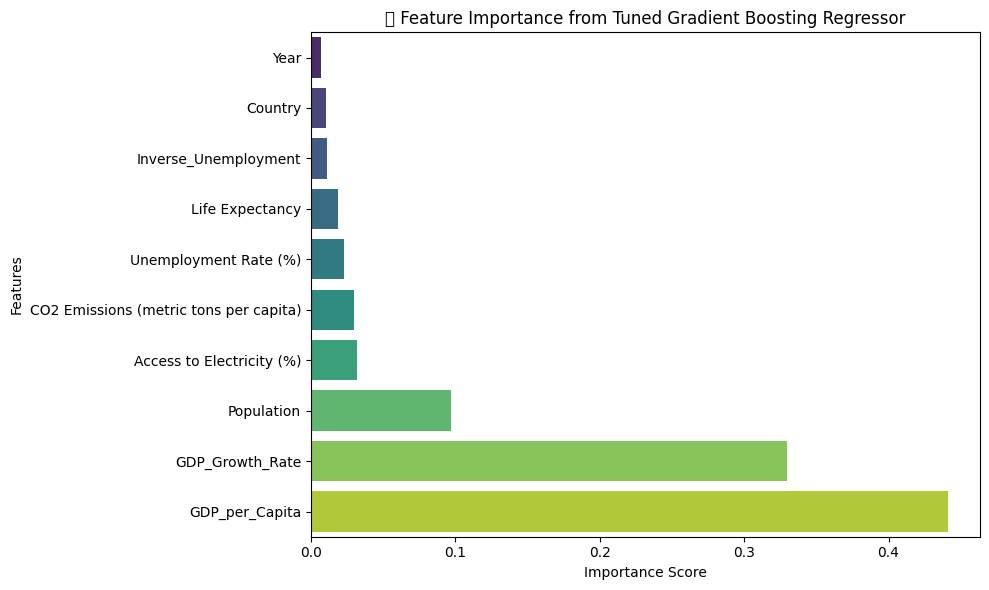

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Feature list used during training
feature_names = ['Country', 'Year', 'Population', 'Life Expectancy', 'Unemployment Rate (%)',
                 'CO2 Emissions (metric tons per capita)', 'Access to Electricity (%)',
                 'GDP_per_Capita', 'GDP_Growth_Rate', 'Inverse_Unemployment']

# Get feature importances from the tuned model
feature_importance = pd.Series(best_model.feature_importances_, index=feature_names)
feature_importance = feature_importance.sort_values(ascending=True)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance.values, y=feature_importance.index, palette='viridis')
plt.title("🔍 Feature Importance from Tuned Gradient Boosting Regressor")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()
